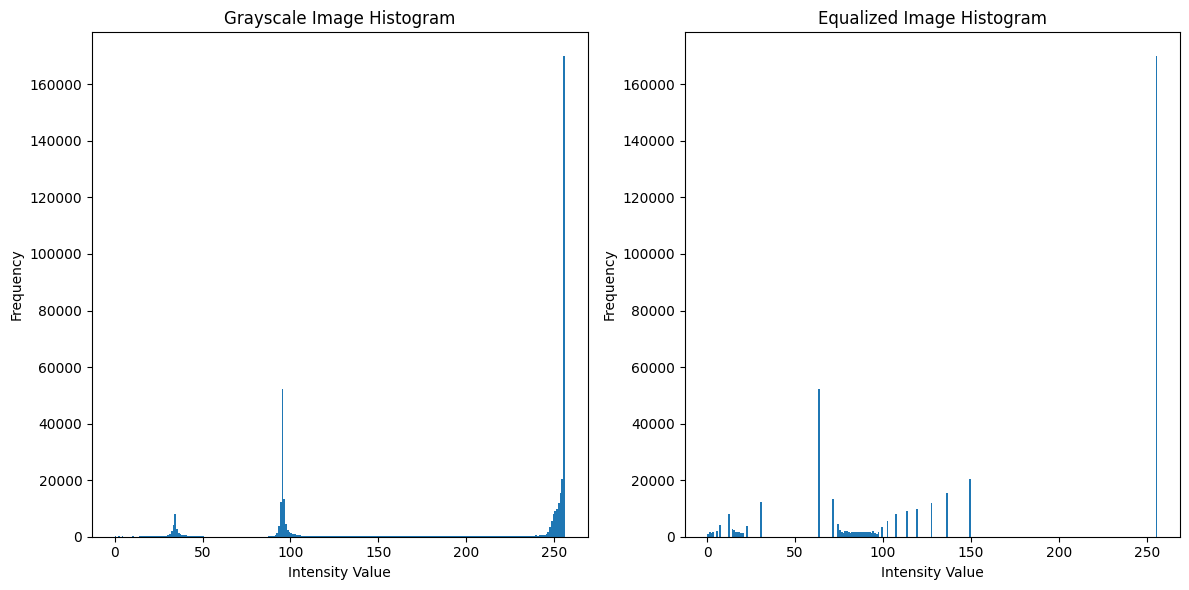

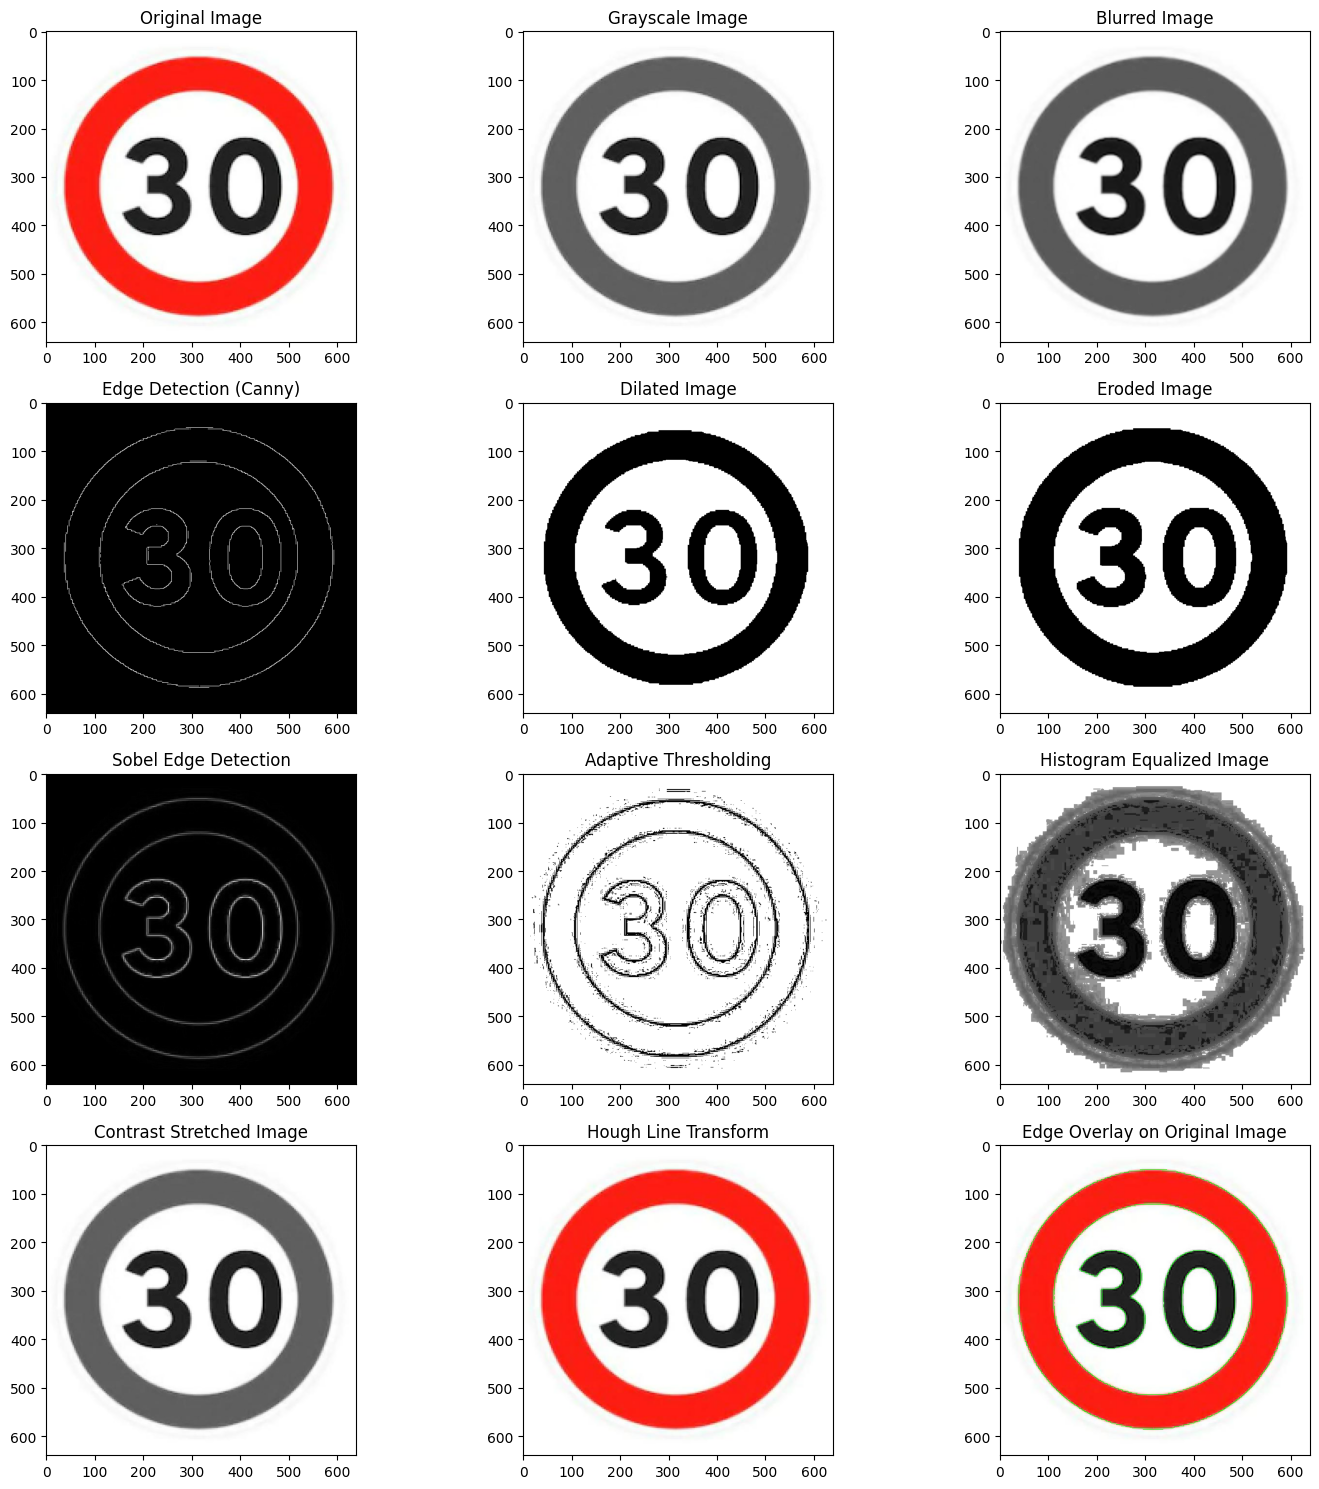

Image processing completed! Results saved in the 'images' folder.


In [ ]:
import cv2  # OpenCV library for image processing
import numpy as np  # NumPy library for numerical operations
from matplotlib import pyplot as plt  # Matplotlib for visualizing results
from skimage import filters, color
from PIL import Image, ImageFilter

# Load an image from the given path
img_path = r'/content/30.jpg'
img = cv2.imread(img_path)  # Read the image from the specified path

# Check if the image was loaded successfully
if img is None:
    print(f"Error: The image at '{img_path}' could not be loaded. Please check the path and try again.")
else:
    # Step 1: Display the Original Image using OpenCV
    def display_original_image(image):
        """Displays the original image in a new window."""
        cv2.imshow('Original Image', image)
        cv2.waitKey(0)  # Wait for a key press to close the window
        cv2.destroyAllWindows()  # Close all OpenCV windows

    # display_original_image(img)

    # Step 2: Convert the image to Grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR image to grayscale

    # Step 3: Apply Gaussian Blur to reduce noise and smooth the image
    blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)  # Kernel size = 5x5, standard deviation = 0

    # Step 4: Perform Canny Edge Detection to detect edges in the image
    edges = cv2.Canny(blurred_img, 50, 150)  # Min and max thresholds for edge detection

    # Step 5: Apply Binary Thresholding
    _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)  # Fixed threshold value

    # Step 6: Perform Morphological Operations
    kernel = np.ones((5, 5), np.uint8)  # Create a 5x5 kernel of ones
    dilated_img = cv2.dilate(binary_img, kernel, iterations=1)  # Dilation: Expands white regions
    eroded_img = cv2.erode(binary_img, kernel, iterations=1)  # Erosion: Shrinks white regions

    # Additional Processing Steps

    # Step 7: Perform Sobel Edge Detection
    sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in the X direction
    sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in the Y direction
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)  # Combine X and Y gradients

    # Step 8: Perform Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(
        gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )  # Block size = 11, C = 2

    # Step 9: Perform Histogram Equalization
    equalized_img = cv2.equalizeHist(gray_img)  # Enhance image contrast by redistributing pixel intensities

    # Step 10: Analyze Histograms for the grayscale and equalized images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(gray_img.ravel(), bins=256, range=[0, 256])  # Plot histogram of grayscale image
    plt.title('Grayscale Image Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(equalized_img.ravel(), bins=256, range=[0, 256])  # Plot histogram of equalized image
    plt.title('Equalized Image Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Step 11: Perform Contrast Stretching
    min_val, max_val = np.min(gray_img), np.max(gray_img)  # Get the min and max intensity values
    contrast_stretched = cv2.normalize(gray_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)  # Normalize image

    # Step 12: Perform Hough Line Transform for line detection
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)  # Rho = 1, Theta = 1 degree, Threshold = 100
    line_img = img.copy()  # Copy original image for drawing lines
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw lines on the image

    # Step 13: Perform Connected Components Analysis
    num_labels, labels = cv2.connectedComponents(binary_img)  # Identify connected components
    colored_labels = np.zeros_like(img)  # Create an empty image for visualization
    for label in range(1, num_labels):
        mask = (labels == label)  # Create a mask for the current label
        colored_labels[mask] = np.random.randint(0, 255, size=3)  # Assign random color to each label

    # Step 14: Overlay Detected Edges on Original Image
    edge_overlay = img.copy()  # Copy original image
    edge_overlay[edges > 0] = [0, 255, 0]  # Highlight edges in green

    # Step 15: Perform Otsu's Thresholding
    _, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Automatically calculate threshold

    # Step 16: Visualize Results Using Matplotlib
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(4, 3, 2)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')

    plt.subplot(4, 3, 3)
    plt.imshow(blurred_img, cmap='gray')
    plt.title('Blurred Image')

    plt.subplot(4, 3, 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection (Canny)')

    plt.subplot(4, 3, 5)
    plt.imshow(dilated_img, cmap='gray')
    plt.title('Dilated Image')

    plt.subplot(4, 3, 6)
    plt.imshow(eroded_img, cmap='gray')
    plt.title('Eroded Image')

    plt.subplot(4, 3, 7)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edge Detection')

    plt.subplot(4, 3, 8)
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.title('Adaptive Thresholding')

    plt.subplot(4, 3, 9)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Histogram Equalized Image')

    plt.subplot(4, 3, 10)
    plt.imshow(contrast_stretched, cmap='gray')
    plt.title('Contrast Stretched Image')

    plt.subplot(4, 3, 11)
    plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    plt.title('Hough Line Transform')

    plt.subplot(4, 3, 12)
    plt.imshow(cv2.cvtColor(edge_overlay, cv2.COLOR_BGR2RGB))
    plt.title('Edge Overlay on Original Image')

    plt.tight_layout()
    plt.show()

    # Save Results to Files
    cv2.imwrite('images/gray_image.jpg', gray_img)
    cv2.imwrite('images/blurred_image.jpg', blurred_img)
    cv2.imwrite('images/edges.jpg', edges)
    cv2.imwrite('images/dilated_image.jpg', dilated_img)
    cv2.imwrite('images/eroded_image.jpg', eroded_img)
    cv2.imwrite('images/sobel_edges.jpg', sobel_edges)
    cv2.imwrite('images/adaptive_threshold.jpg', adaptive_thresh)
    cv2.imwrite('images/equalized_image.jpg', equalized_img)
    cv2.imwrite('images/contrast_stretched.jpg', contrast_stretched)
    cv2.imwrite('images/line_img.jpg', line_img)
    cv2.imwrite('images/edge_overlay.jpg', edge_overlay)
    cv2.imwrite('images/otsu_thresh.jpg', otsu_thresh)

    print("Image processing completed! Results saved in the 'images' folder.")